# Diferencias centrales
Para aumentar la precisión al calcular una derivada, se puede usar $\textit{diferencia central}$
\begin{equation} \frac{df}{dx}\simeq\frac{f(x+h/2)-f(x-h/2)}{h} \end{equation}
Se puede observar que es similar a la derivada habitual, lo único que cambia es que se considera puntos simétricos alrededor de $x$, a una distancia $h/2$.

Ahora, para calcular el error de aproximación de la diferencia central, expandimos:
\begin{align} f(x+h/2)=f(x)+\frac{1}{2}hf'(x)+\frac{1}{8}h^2f''(x)+\frac{1}{48}f'''(x)+...\\
f(x-h/2)=f(x)-\frac{1}{2}hf'(x)+\frac{1}{8}h^2f''(x)-\frac{1}{48}f'''(x)+...\end{align}

Restando y despejando $f'(x)$:
\begin{equation} f'(x)=\frac{f(x+h/2)-f(x-h/2)}{h}-\frac{1}{24}h^2f'''(x)+...\end{equation}

De aquí, a primer orden, la magnitud del error es ahora $\frac{1}{24}h^2|f'''(x)|$

Por lo que el error de la estimación de la derivada es
\begin{equation} \epsilon =\frac{2C|f(x)|}{h}+\frac{1}{24}h^2|f'''(x)|.\end{equation}

donde el primer término es el error de redondeo.

Además el valor óptimo  del valor de h (que se encuentra derivando) es:
\begin{equation} h=\left(24C\left|\frac{f(x)}{f'''(x)}\right|\right)^{1/3},\end{equation}
y al reemplazar en el error
\begin{equation} \epsilon=\tfrac{1}{8}h^2|f'''(x)|=\left(\tfrac{9}{8}C^2[f(x)]^2|f'''(x)|\right)^{1/3}\end{equation}

### Ejemplo: Derivada de una función muestreada.


Si se quiere calcular la derivada en un punto de una función muestreada con puntos espaciados uniformemente con una distancia de separación $h$. Uno puede elegir la diferencia central(a), pero se tendría que usar los puntos que estan alrededor, a una distancia $h$, por lo que la separación total sería de $2h$, entonces uno podría pensar que es mejor usar la derivada habitual, que tiene una separación de $h$. Si se quiere saber cual de las dos derivadas elegir: para que la diferencia central sea más precisa, se debe cumplir que 
\begin{equation} h<\left|\frac{f''(x)}{f'''(x)}\right|\end{equation}
    Sin embargo, si queremos calcular la derivada de un punto que se encuentra entre dos puntos de la muestra(b), entonces podriamos usar la diferencia central habitual, con una separación $h$. Entonces en este caso si se obtiene una respuesta más precisa.

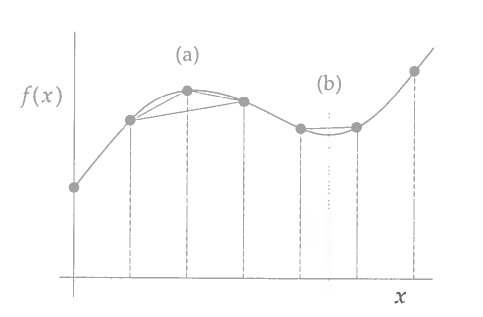

#### Calcular la derivada de la función $f(x)=1+\frac{1}{2} tanh(2x)$

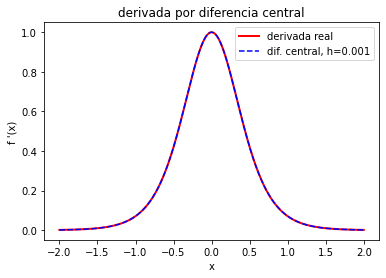

In [19]:
import numpy as np
import matplotlib.pyplot as plt
def df0(x):
    return (1/np.cosh(2*x))**2
def f(x):
    return 1+0.5*np.tanh(2*x)

def df(x,h):
    return (f(x+h/2)-f(x-h/2))/h

x0 = np.linspace(-2.0,2.0,1000)

x1 , h = np.linspace(-2.0,2.0,4000,retstep=True)

d=[]
for x in x1:
    d.append(df(x,h))
    

plt.plot(x0 , df0(x0), "r", lw=2 , label="derivada real")
plt.plot(x1 , d, "b--", label="dif. central, h=%.3f"%h)
plt.title("derivada por diferencia central")
plt.ylabel("f '(x)")
plt.xlabel("x")

plt.savefig("der.pdf",dpi=300)
plt.legend(loc="upper right")
plt.show()